In [1]:
from functions import *
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
data5 = load_data("bianconi-barabasi_10000_5").fillna(method="ffill")

Loading dataset: Completed!


In [3]:
data10 = load_data("bianconi-barabasi_10000_10").fillna(method="ffill")

Loading dataset: Completed!


In [5]:
sliced = data5.xs(("soften","fixed"),level=("reaction","fear"))
sliced

run                   0                           1                       ...   
compartment            S    E    I    R    D       S    E    I    R    D  ...   
feedback t                                                                ...   
short    0.000    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  ...  \
         0.125    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  ...   
         0.250    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  ...   
         0.375    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  ...   
         0.500    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  ...   
...                  ...  ...  ...  ...  ...     ...  ...  ...  ...  ...  ...   
all      174.375     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  ...   
         174.500     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  ...   
         174.625     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  ...   
         174.750     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  ...   
         174.875     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  ...   

run                   98                          99                      
compartment            S    E    I    R    D       S    E    I    R    D  
feedback t                                                                
short    0.000    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  
         0.125    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  
         0.250    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  
         0.375    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  
         0.500    9999.0  0.0  1.0  0.0  0.0  9999.0  0.0  1.0  0.0  0.0  
...                  ...  ...  ...  ...  ...     ...  ...  ...  ...  ...  
all      174.375     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  
         174.500     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  
         174.625     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  
         174.750     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  
         174.875     NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  

[7629 rows x 500 columns]

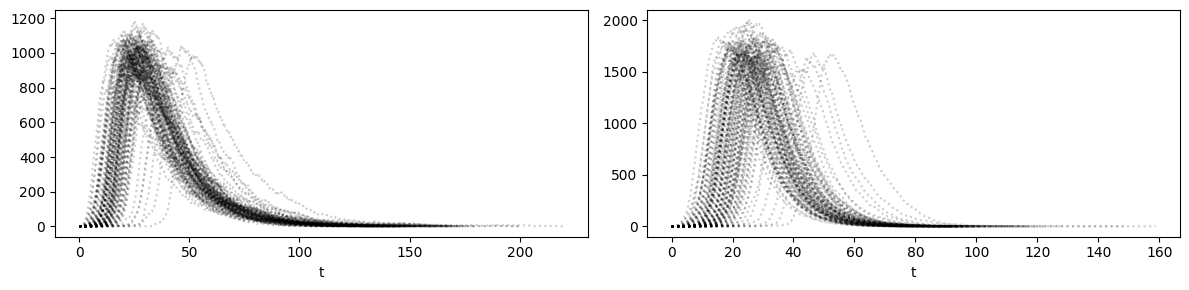

In [7]:
fig, axs = plt.subplots(1,2,figsize=(12,3))
for i,feedback in enumerate(["short","long"]):
    subset = sliced.xs(feedback,level="feedback").xs("I", axis=1, level="compartment")
    subset.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[i])
fig.tight_layout()

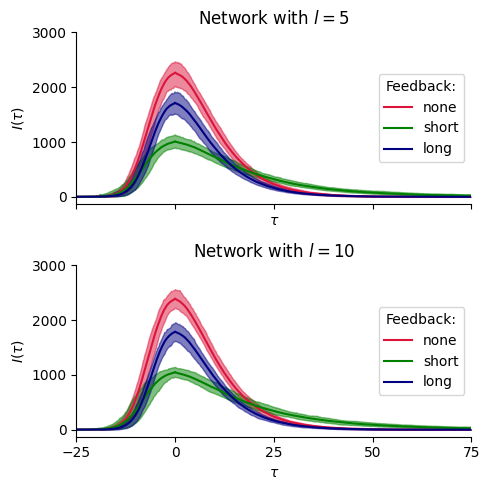

In [14]:
data = [data5,data10]

fig, axs = plt.subplots(2, 1, figsize=(5,5), sharex=True)
mycolors = ["crimson","g","navy"]
for i,df in enumerate(data):
    none = mean_quantiles(offset_at_peak(df.xs(("none","none","none"),level=[0,1,2]).xs("I",axis=1,level="compartment")), CI=0.9)
    sliced = df.xs(("soften","fixed"),level=("reaction","fear")).xs("I",axis=1,level="compartment")
    short = mean_quantiles(offset_at_peak(sliced.xs("short",level="feedback")), CI=0.9)
    long = mean_quantiles(offset_at_peak(sliced.xs("long",level="feedback")), CI=0.9)
    axs[i].plot(none["mean"], color=mycolors[0], label="none")
    axs[i].fill_between(none.index, none["low"], none["high"], color=mycolors[0], alpha=0.5)
    axs[i].plot(short["mean"], color=mycolors[1], label="short")
    axs[i].fill_between(short.index, short["low"], short["high"], color=mycolors[1], alpha=0.5)
    axs[i].plot(long["mean"], color=mycolors[2], label="long")
    axs[i].fill_between(long.index, long["low"], long["high"], color=mycolors[2], alpha=0.5)

for ax in axs:
    ax.set_xlabel(r"$\tau$")
    ax.set_xlim([-25,75])
    ax.set_xticks(np.linspace(-25,75,5))
    ax.set_ylabel(r"$I(\tau)$")
    ax.set_yticks(np.linspace(0,3000,4))
    ax.spines[["top","right"]].set_visible(False)
    ax.legend(loc="center right", title="Feedback:")
axs[0].set_title(r"Network with $l=5$")
axs[1].set_title(r"Network with $l=10$")

fig.tight_layout()
fig.savefig("plots/feedback/short_vs_long_evolution.png")
fig.savefig("plots/feedback/short_vs_long_evolution.pdf")

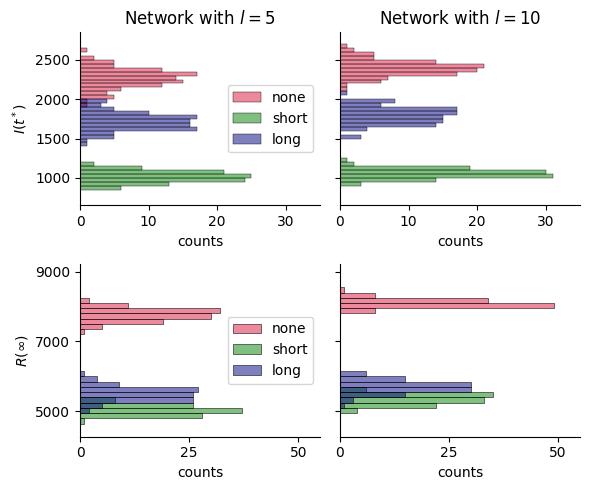

In [131]:
data = [data5,data10]

fig, axs = plt.subplots(2, 2, figsize=(6,5), sharey="row")
mycolors = ["crimson","g","navy"]
bins = [np.linspace(750,2750,41),np.linspace(4500,9000,31)]
for i,df in enumerate(data):
    for j,comp in enumerate(["I","R"]):
        none = df.xs(("none","none","none"),level=(0,1,2)).xs(comp,axis=1,level="compartment")
        sliced = df.xs(("soften","fixed"),level=("reaction","fear")).xs(comp,axis=1,level="compartment")
        short = sliced.xs("short",level="feedback")
        long = sliced.xs("long",level="feedback")
        if comp == "I":
            sb.histplot(y=none.apply(np.max), bins=bins[j], color=mycolors[0], alpha=0.5, label="none", ax=axs[j,i])
            sb.histplot(y=short.apply(np.max), bins=bins[j], color=mycolors[1], alpha=0.5, label="short", ax=axs[j,i])
            sb.histplot(y=long.apply(np.max), bins=bins[j], color=mycolors[2], alpha=0.5, label="long", ax=axs[j,i])
        elif comp == "R":
            sb.histplot(y=none.iloc[-1], bins=bins[j], color=mycolors[0], alpha=0.5, label="none", ax=axs[j,i])
            sb.histplot(y=short.iloc[-1], bins=bins[j], color=mycolors[1], alpha=0.5, label="short", ax=axs[j,i])
            sb.histplot(y=long.iloc[-1], bins=bins[j], color=mycolors[2], alpha=0.5, label="long", ax=axs[j,i])

axs[0,0].set_title(r"Network with $l=5$")
axs[0,1].set_title(r"Network with $l=10$")

axs[0,0].set_ylabel(r"$I(t^*)$")
axs[0,0].set_yticks(np.linspace(1000,2500,4))
axs[0,0].legend(loc="center right", title="Feedback:")

axs[1,0].set_ylabel(r"$R(\infty)$")
axs[1,0].set_yticks(np.linspace(5000,9000,3))

for ax in axs.flatten():
    ax.set_xlabel("counts")
    ax.spines[["top","right"]].set_visible(False)
for ax in axs[0]:
    ax.set_xticks(np.linspace(0,30,4))
    ax.set_xlim([0,35])
for ax in axs[1]:
    ax.set_xticks(np.linspace(0,50,3))
    ax.set_xlim([0,55])

fig.tight_layout()
fig.savefig("plots/feedback/short_vs_long_peak&attackrate.png")
fig.savefig("plots/feedback/short_vs_long_peak&attackrate.pdf")

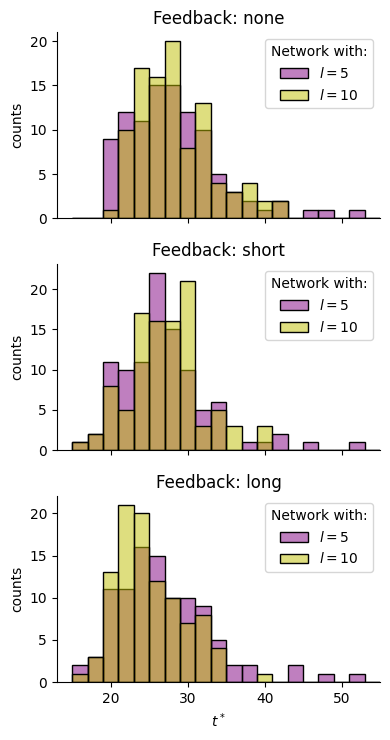

In [10]:
data = [data5,data10]

fig, axs = plt.subplots(3, 1, figsize=(4,7.5), sharex=True)
mycolors = ["purple","y"]
datalab = [r"$l=$"+str(n) for n in [5,10]]
bins = np.linspace(15,55,21)
for i,df in enumerate(data):
    none = df.xs(("none","none","none"),level=[0,1,2]).xs("I",axis=1,level="compartment")
    sliced = df.xs(("soften","fixed"),level=("reaction","fear")).xs("I",axis=1,level="compartment")
    short = sliced.xs("short",level="feedback")
    long = sliced.xs("long",level="feedback")
    sb.histplot(x=none.index[none.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[i], alpha=0.5, label=datalab[i], ax=axs[0])
    sb.histplot(x=short.index[short.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[i], alpha=0.5, label=datalab[i], ax=axs[1])
    sb.histplot(x=long.index[long.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[i], alpha=0.5, label=datalab[i], ax=axs[2])

axs[0].set_title("Feedback: none")
axs[1].set_title("Feedback: short")
axs[2].set_title("Feedback: long")
axs[2].set_xlabel(r"$t^*$")
for ax in axs:
    ax.set_ylabel("counts")
    ax.set_xticks(np.linspace(20,50,4))
    ax.set_xlim([13,55])
    ax.spines[["top","right"]].set_visible(False)
    ax.legend(title="Network with:")

fig.tight_layout()
fig.savefig("plots/feedback/short_vs_long_peakloc.png")
fig.savefig("plots/feedback/short_vs_long_peakloc.pdf")